In [6]:
#Loading data for mini-challenges, data is about sales of champagne bottles
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.metrics import mean_squared_error
df = pd.read_csv('../data/perrin-freres-monthly-champagne.csv')
df['Month'] = pd.to_datetime(df['Month'])
X = df['Month']
y = df['Sales']
df.head()

,Month,Sales
0,1964-01-01,2815
1,1964-02-01,2672
2,1964-03-01,2755
3,1964-04-01,2721
4,1964-05-01,2946


<img src="../images/icon/ppt-icons.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br />

##  Mini-Challenge - 1
Plot a time plot for the sales column.

Text(0.5,1,'Champagne Sales')

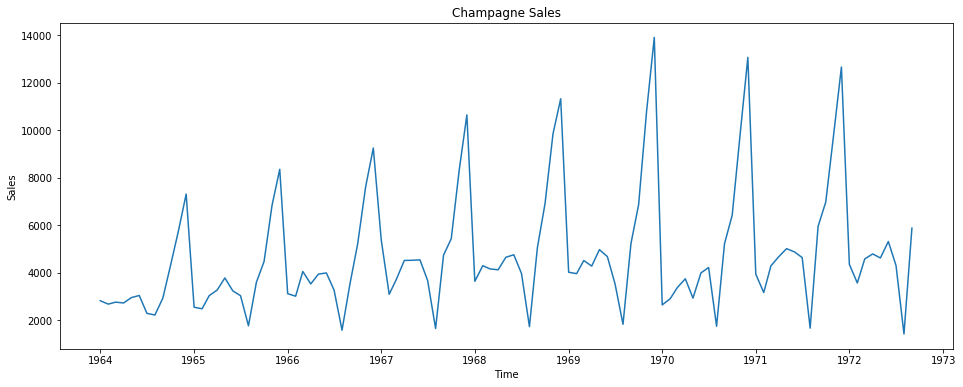

In [7]:
plt.figure(figsize=(16, 6))
plt.plot(X,y)
plt.xlabel("Time")
plt.ylabel("Sales")
plt.title("Champagne Sales")

<img src="../images/icon/ppt-icons.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

##  Mini-Challenge - 2
Plot a box plot for the sales column showing sales monthwise.

Text(0.5,1,'Champagne Sales')

<Figure size 1152x504 with 0 Axes>

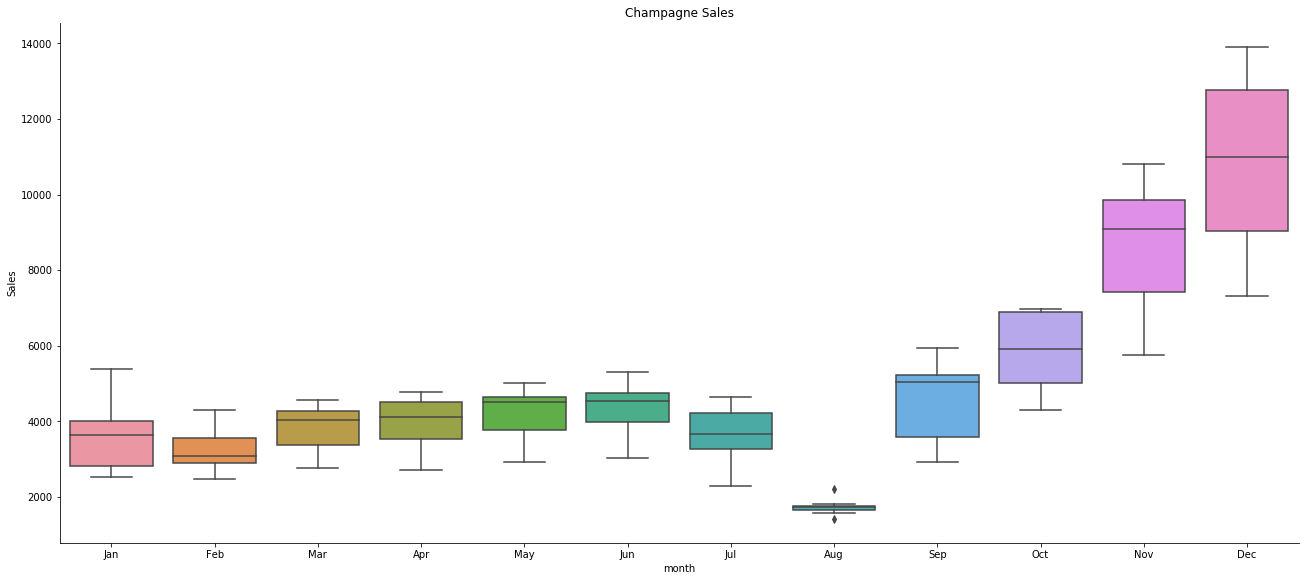

In [8]:
df["month"] = df["Month"].dt.strftime('%b')
plt.figure(figsize=(16, 7))
sns.factorplot(x="month", y="Sales", data=df,kind="box", col_order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
       'Sep', 'Oct', 'Nov', 'Dec'], size=8, aspect=float(16/7))
plt.xlabel("month")
plt.ylabel("Sales")
plt.title("Champagne Sales")

<img src="../images/icon/ppt-icons.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

##  Mini-Challenge - 3
Split data into train and test. Fit a SARIMA model on the data.

In [9]:
from statsmodels.tsa.statespace import sarimax
X_train,X_test,y_train,y_test = train_test_split(X,y)
mod = sarimax.SARIMAX(y_train, trend='n', order=(1,1,1), seasonal_order=(1,1,1,12))
results = mod.fit(disp=-1)
print(results.summary())

/home/pranav/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                              Sales   No. Observations:                   78
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -595.978
Date:                            Fri, 22 Feb 2019   AIC                           1201.956
Time:                                    15:07:12   BIC                           1212.828
Sample:                                         0   HQIC                          1206.246
                                             - 78                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0697      0.161     -0.433      0.665      -0.385       0.246
ma.L1         -0.9989      8.083   

/home/pranav/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<img src="../images/icon/ppt-icons.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

##  Mini-Challenge - 4
Predict on your test data and calculate the squared error.

In [10]:
pred = pd.DataFrame(results.forecast(len(X_test)))
pred.columns = ["yhat"]
pred.index = X_test.index
measure = math.pow(mean_squared_error(y_test, pred.values), 0.5)
measure

/home/pranav/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


3431.075806269853